## Лабораторна робота №2  
2)	Реалізувати функції one-hot-encoding та softmax засобами базового Python 3.6. Розділити змінні на чисельні та категоріальні, масштабувати і нормувати дані.

3)	Реалізувати модель логістичної регресії засобами базового Python для розв’язання задачі бінарної класифікації для повного набору ознак із попередньо оброблених даних і для попередньо необроблених даних, а також лише для кількісних ознак. 

4)	Зробити висновок про зміну якості моделі в залежності від застосування попередньої обробки даних і об’єму ознак, на яких навчалася модель.   


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from matplotlib import pyplot as plt

In [2]:
#df = pd.read_csv('C:/Users/Kate/Desktop/Data Analysis/Datasets/Ecommerce Purchases.csv')
#df = pd.read_csv('C:/Users/Kate/Desktop/Data Analysis/Datasets/supermarket_sales - Sheet1.csv')
df = pd.read_csv('C:/Users/Kate/Desktop/Data Analysis/Datasets/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
enc = OneHotEncoder(handle_unknown='ignore')
>>> X = [['Male', 1], ['Female', 2]]
>>> enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [43]:
enc.categories_
[array(['Female', 'Male'], dtype=object), array([1, 0], dtype=object)]

[array(['Female', 'Male'], dtype=object), array([1, 0], dtype=object)]

In [50]:
#a = enc.transform([['Female', 1], ['Male', 4]]).toarray()
a = enc.transform([['Female', 1], ['Male', 0]]).toarray()
a

array([[1., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [57]:
#a = enc.inverse_transform(a)
#a                      

In [67]:
drop_binary_enc = OneHotEncoder(drop='if_binary').fit(X)
db = drop_binary_enc.transform([['Female', 1], ['Male', 2]]).toarray()
db
#array([[0., 1., 0., 0.],
#       [1., 0., 1., 0.]])

array([[0., 0.],
       [1., 1.]])

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Normalization
Scaling from [0-1]

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [56]:
X1 = df[['CustomerID', 'Age', 'Annual Income (k$)']] #Drop column Gender 
y1 = df['Spending Score (1-100)']
y1 = y1.values.reshape(-1, 1)

In [57]:
print(X1)

     CustomerID  Age  Annual Income (k$)
0             1   19                  15
1             2   21                  15
2             3   20                  16
3             4   23                  16
4             5   31                  17
..          ...  ...                 ...
195         196   35                 120
196         197   45                 126
197         198   32                 126
198         199   32                 137
199         200   30                 137

[200 rows x 3 columns]


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.2, random_state=32)

In [59]:
Y_train

array([[ 1],
       [16],
       [76],
       [74],
       [97],
       [46],
       [92],
       [63],
       [88],
       [13],
       [ 7],
       [ 5],
       [58],
       [97],
       [27],
       [46],
       [59],
       [46],
       [73],
       [50],
       [35],
       [14],
       [11],
       [35],
       [76],
       [56],
       [93],
       [48],
       [15],
       [77],
       [55],
       [35],
       [16],
       [40],
       [41],
       [51],
       [26],
       [92],
       [65],
       [18],
       [ 4],
       [98],
       [73],
       [41],
       [55],
       [43],
       [17],
       [88],
       [13],
       [47],
       [81],
       [15],
       [79],
       [ 6],
       [43],
       [59],
       [47],
       [34],
       [44],
       [89],
       [42],
       [42],
       [48],
       [83],
       [69],
       [49],
       [90],
       [56],
       [46],
       [ 3],
       [73],
       [50],
       [49],
       [22],
       [91],
       [49],
       [39],

In [60]:
from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression() #any features??
log_model.fit(X_train,Y_train)

log_model.predict(X_test)
score = log_model.score(X_test, Y_test)
print(score)

0.025


C:\Users\Kate\anaconda3\envs\main_acad_ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Kate\anaconda3\envs\main_acad_ds\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)

In [54]:
# transform training data
X_train_norm = norm.transform(X_train)

In [52]:
# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [61]:
Y_train_norm = norm.transform(Y_train)

ValueError: X has 1 features, but MinMaxScaler is expecting 3 features as input.

In [34]:
#already normalised arrays of X
X_test_norm

array([[0.61306533, 0.42307692, 0.44262295],
       [0.93467337, 0.69230769, 0.70491803],
       [0.83919598, 0.28846154, 0.58196721],
       [0.50753769, 0.59615385, 0.3852459 ],
       [0.14572864, 0.09615385, 0.1147541 ],
       [0.37688442, 0.15384615, 0.31967213],
       [0.72361809, 0.13461538, 0.50819672],
       [0.14070352, 0.42307692, 0.1147541 ],
       [0.6080402 , 0.38461538, 0.42622951],
       [0.91457286, 0.53846154, 0.68032787],
       [0.13567839, 0.32692308, 0.10655738],
       [0.90954774, 0.26923077, 0.67213115],
       [0.1959799 , 0.03846154, 0.18032787],
       [0.11557789, 0.25      , 0.08196721],
       [0.01005025, 0.03846154, 0.00819672],
       [0.86934673, 0.34615385, 0.59016393],
       [0.53768844, 0.69230769, 0.39344262],
       [0.08542714, 0.03846154, 0.04918033],
       [0.54773869, 0.92307692, 0.39344262],
       [0.59296482, 0.63461538, 0.42622951],
       [0.13065327, 0.51923077, 0.10655738],
       [0.23115578, 0.61538462, 0.20491803],
       [0.

## Standartization
Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In the following formula of standardization, the mean is shown as μ and the standard deviation is shown as σ.

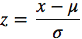

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [42]:
X_train_stand.describe()

,CustomerID,Age,Annual Income (k$)
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,6.106227e-17,1.221245e-16,-4.440892e-17
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.734996e+00,-1.431640e+00,-1.735691e+00
25%,-8.202432e-01,-7.244388e-01,-6.800440e-01
50%,-4.422030e-02,-2.293983e-01,-2.026465e-02
75%,8.705329e-01,6.899628e-01,6.395147e-01
max,1.715921e+00,2.245804e+00,2.863914e+00


In [37]:
columns = df[['CustomerID', 'Age', 'Annual Income (k$)']]

In [38]:
for i in columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [41]:
X_train_stand.describe()

,CustomerID,Age,Annual Income (k$)
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,6.106227e-17,1.221245e-16,-4.440892e-17
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.734996e+00,-1.431640e+00,-1.735691e+00
25%,-8.202432e-01,-7.244388e-01,-6.800440e-01
50%,-4.422030e-02,-2.293983e-01,-2.026465e-02
75%,8.705329e-01,6.899628e-01,6.395147e-01
max,1.715921e+00,2.245804e+00,2.863914e+00


In [63]:
from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression() #any features??
log_model.fit(X_train_norm,Y_train)

log_model.predict(X_test_norm)
score = log_model.score(X_test_norm, Y_test)
print(score)

0.025


C:\Users\Kate\anaconda3\envs\main_acad_ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
